Analyzing netflixs content strategy to understand how various factors  like content type, language, release season, and timing affect viewership patterns. By identifying the best-performing content and the timing of its release, the aim is to uncover insights into how Netflix maximizes audience engagement throughout the year.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff

In [6]:
N_data=pd.read_csv('/content/drive/MyDrive/DataSETS/netflix_content_2023.csv')
N_copy=N_data.copy()

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [12]:
N_copy.head()

,Title,Available Globally?,Release Date,Hours Viewed,Language Indicator,Content Type
0,The Night Agent: Season 1,Yes,2023-03-23,812100000,English,Show
1,Ginny & Georgia: Season 2,Yes,2023-01-05,665100000,English,Show
2,The Glory: Season 1 // 더 글로리: 시즌 1,Yes,2022-12-30,622800000,Korean,Show
3,Wednesday: Season 1,Yes,2022-11-23,507700000,English,Show
4,Queen Charlotte: A Bridgerton Story,Yes,2023-05-04,503000000,English,Movie


In [13]:
N_copy.isnull().sum()

,0
Title,0
Available Globally?,0
Release Date,16646
Hours Viewed,0
Language Indicator,0
Content Type,0


In [14]:
date_lis=N_copy['Release Date']

In [15]:
date_lis.isnull().sum()

16646

In [16]:
N_copy['Hours Viewed']=N_copy['Hours Viewed'].str.replace(',','')

In [17]:
modvie=N_copy['Hours Viewed']
modvie.astype('float')
modvie.isnull().sum()

0

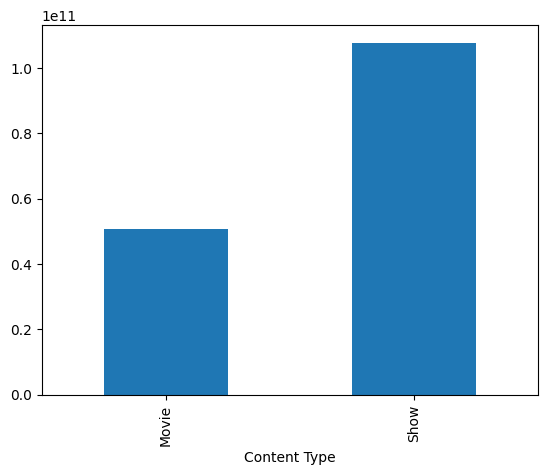

In [18]:
#we can plot a graph for number of hours viewed and type of content
N_copy['Hours Viewed']=N_copy['Hours Viewed'].astype('float')
N_copy.groupby('Content Type')['Hours Viewed'].sum().plot(kind='bar')
plt.show()

In [19]:
#plot a graph between availability globally and hours viewed
N_copy['Available Globally?'].isnull().sum()

0

In [20]:
N_copy['Available Globally?'].unique()

array(['Yes', 'No'], dtype=object)

In [21]:
N_copy['Available Globally?'].value_counts()

,count
Available Globally?,
No,17162
Yes,7650


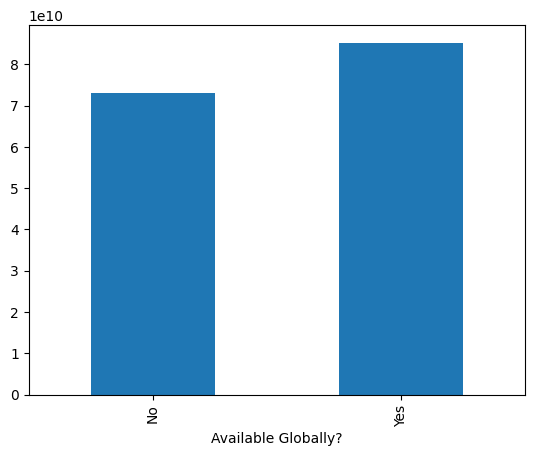

In [22]:
N_copy.groupby('Available Globally?')['Hours Viewed'].sum().plot(kind='bar')
plt.show()

In [ ]:
import pandas as pd

contingency_table = pd.crosstab(N_copy['Available Globally?'], N_copy['Content Type'])
print(contingency_table)

Content Type         Movie  Show
Available Globally?             
No                   10717  6445
Yes                   3387  4263


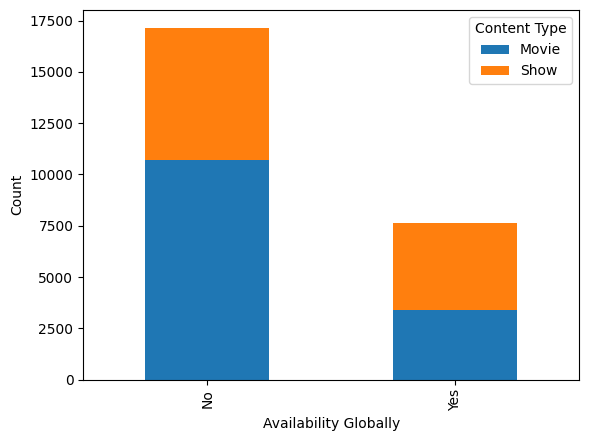

In [ ]:
contingency_table.plot(kind='bar',stacked=True)
plt.xlabel('Availability Globally')
plt.ylabel('Count')
plt.legend(title='Content Type')

plt.show()

In [ ]:
N_copy['Language Indicator'].value_counts()

,count
Language Indicator,
English,17268
Non-English,3252
Japanese,2297
Korean,1582
Hindi,374
Russian,39


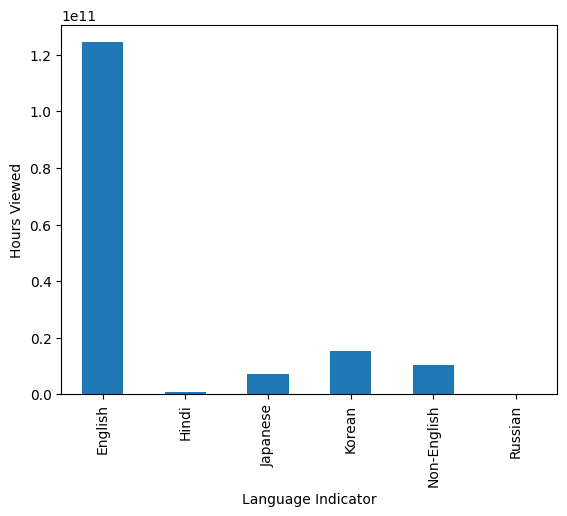

In [ ]:
N_copy.groupby('Language Indicator')['Hours Viewed'].sum().plot(kind='bar')
plt.xlabel("Language Indicator")
plt.ylabel("Hours Viewed")
plt.show()

In [ ]:
N_copy['Title'].value_counts()

,count
Title,
The Night Agent: Season 1,2
Animal Kingdom: Season 1,2
Whindersson Nunes: My Own Show! // Whindersson Nunes: É de Mim Mesmo,2
The World’s Best Assassin: To Reincarnate in a Different World Aristocrat: Season 1 // 世界最高の暗殺者、異世界貴族に転生する: シーズン1,2
The Wiggles' World: Season 1,2
...,...
TIGER & BUNNY,1
To Love Is To Grow // Amar es madurar,1
Together Together,1


In [ ]:
eng_movies=N_copy[N_copy['Language Indicator']=='English']

In [ ]:
eng_movies.head()

,Title,Available Globally?,Release Date,Hours Viewed,Language Indicator,Content Type
0,The Night Agent: Season 1,Yes,2023-03-23,812100000.0,English,Show
1,Ginny & Georgia: Season 2,Yes,2023-01-05,665100000.0,English,Show
3,Wednesday: Season 1,Yes,2022-11-23,507700000.0,English,Show
4,Queen Charlotte: A Bridgerton Story,Yes,2023-05-04,503000000.0,English,Movie
5,You: Season 4,Yes,2023-02-09,440600000.0,English,Show


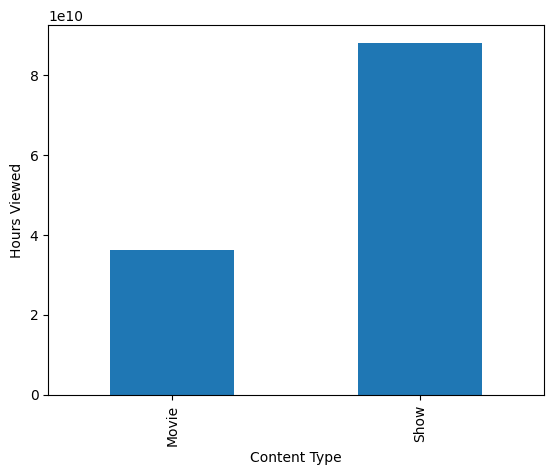

In [ ]:
#graph between content type and hours viewed in english language
eng_movies.groupby('Content Type')['Hours Viewed'].sum().plot(kind='bar')
plt.xlabel("Content Type")
plt.ylabel("Hours Viewed")


plt.show()


In [ ]:
print("min",eng_movies['Hours Viewed'].min())
print("max",eng_movies['Hours Viewed'].max())
print("mean",eng_movies['Hours Viewed'].mean())
print("median",eng_movies['Hours Viewed'].median())
print("mode",eng_movies['Hours Viewed'].mode())


min 100000.0
max 812100000.0
mean 7206491.77669678
median 1400000.0
mode 0    100000.0
Name: Hours Viewed, dtype: float64


In [ ]:
import pandas as pd

# Assuming you have your DataFrame 'eng_movies' already

t_g_y = pd.crosstab(eng_movies['Available Globally?'],
                   eng_movies['Content Type'],
                   values=eng_movies['Hours Viewed'],
                   aggfunc='sum')

print(t_g_y)

Content Type                Movie          Show
Available Globally?                            
No                   1.665390e+10  4.175030e+10
Yes                  1.964700e+10  4.639050e+10


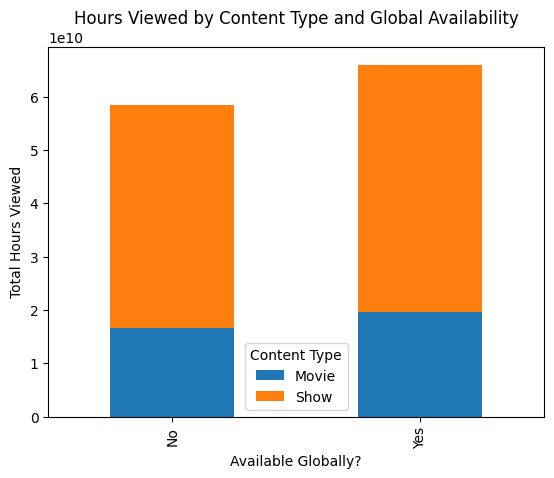

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have your crosstab 't_g_y' already

t_g_y.plot(kind='bar', stacked=True)  # Create stacked bar chart
plt.xlabel("Available Globally?")
plt.ylabel("Total Hours Viewed")
plt.title("Hours Viewed by Content Type and Global Availability")
plt.legend(title="Content Type")
plt.show()

In [25]:
##english language movies or shows are most viewd in netflix when compared to other languages
N_copy['Release Date']=pd.to_datetime(N_copy['Release Date'])
N_copy['Release Month']=N_copy['Release Date'].dt.month
N_copy.head()

,Title,Available Globally?,Release Date,Hours Viewed,Language Indicator,Content Type,Release Month
0,The Night Agent: Season 1,Yes,2023-03-23,812100000.0,English,Show,3.0
1,Ginny & Georgia: Season 2,Yes,2023-01-05,665100000.0,English,Show,1.0
2,The Glory: Season 1 // 더 글로리: 시즌 1,Yes,2022-12-30,622800000.0,Korean,Show,12.0
3,Wednesday: Season 1,Yes,2022-11-23,507700000.0,English,Show,11.0
4,Queen Charlotte: A Bridgerton Story,Yes,2023-05-04,503000000.0,English,Movie,5.0


In [26]:
monthly_viewer_ship=N_copy.groupby('Release Month')['Hours Viewed'].sum()
monthly_viewer_ship

,Hours Viewed
Release Month,
1.0,7.271600e+09
2.0,7.103700e+09
3.0,7.437100e+09
4.0,6.865700e+09
5.0,7.094600e+09
6.0,8.522000e+09
7.0,6.524800e+09
8.0,6.817800e+09
9.0,7.262200e+09


In [ ]:
fig=go.Figure(data=[go.Scatter(x=monthly_viewer_ship.index,y=monthly_viewer_ship.values,mode='lines+markers',marker=dict(color='red'),line=dict(color='blue'))])
fig.update_layout(title='Monthly Viewer Ship',xaxis_title='Release Month',yaxis_title='Hours Viewed',xaxis=dict(tickmode='array',tickvals=list(range(1,13)),ticktext=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']))
fig.show()



The graph shows the total viewership hours by month, which reveals a notable increase in viewership during June and a sharp rise toward the end of the year in December. It suggests that Netflix experiences spikes in audience engagement during these periods, possibly due to strategic content releases, seasonal trends, or holidays, while the middle months have a steady but lower viewership pattern.

In [23]:
top_5_titles=N_copy.nlargest(5,'Hours Viewed')

In [24]:
top_5_titles

,Title,Available Globally?,Release Date,Hours Viewed,Language Indicator,Content Type
0,The Night Agent: Season 1,Yes,2023-03-23,812100000.0,English,Show
1,Ginny & Georgia: Season 2,Yes,2023-01-05,665100000.0,English,Show
18227,King the Land: Limited Series // 킹더랜드: 리미티드 시리즈,Yes,2023-06-17,630200000.0,Korean,Movie
2,The Glory: Season 1 // 더 글로리: 시즌 1,Yes,2022-12-30,622800000.0,Korean,Show
18214,ONE PIECE: Season 1,Yes,2023-08-31,541900000.0,English,Show


Content type analysis in accordance with months and total hours viewed


In [27]:
monthly_viewership_by_month=N_copy.pivot_table(index='Release Month',columns='Content Type',values='Hours Viewed',aggfunc='sum')
monthly_viewership_by_month

Content Type,Movie,Show
Release Month,,
1.0,2.275900e+09,4.995700e+09
2.0,1.654400e+09,5.449300e+09
3.0,2.109400e+09,5.327700e+09
4.0,2.757600e+09,4.108100e+09
5.0,2.520500e+09,4.574100e+09
6.0,3.135800e+09,5.386200e+09
7.0,1.615700e+09,4.909100e+09
8.0,2.186400e+09,4.631400e+09
9.0,2.092300e+09,5.169900e+09


In [30]:
fig=go.Figure()
for content_type in monthly_viewership_by_month.columns:
    fig.add_trace(go.Scatter(x=monthly_viewership_by_month.index,y=monthly_viewership_by_month[content_type],mode='lines+markers',name=content_type)) # Corrected the typo in variable name from monthly_viewer_ship to monthly_viewership_by_month
fig.update_layout(title='Monthly Viewer Ship',xaxis_title='Release Month',yaxis_title='Hours Viewed',xaxis=dict(tickmode='array',tickvals=list(range(1,13)),ticktext=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']))
fig.show()

In [31]:
N_copy['Seasonal_view']=N_copy["Release Month"].apply(lambda x: "Winter" if x in [12,1,2] else ("Spring" if x in [3,4,5] else ("summer" if x in [6,7,8] else "Fall")))
N_copy['Seasonal_view'].value_counts()

,count
Seasonal_view,
Fall,18921
summer,1975
Spring,1961
Winter,1955


In [34]:
seasonal_viewership=N_copy.pivot_table(index='Seasonal_view',columns='Content Type',values='Hours Viewed',aggfunc='sum')
seasonal_viewership

Content Type,Movie,Show
Seasonal_view,,
Fall,2.982720e+10,6.088160e+10
Spring,7.387500e+09,1.400990e+10
Winter,6.485200e+09,1.794590e+10
summer,6.937900e+09,1.492670e+10


In [35]:
fig=go.Figure()
for content_type in seasonal_viewership.columns:
    fig.add_trace(go.Scatter(x=seasonal_viewership.index,y=seasonal_viewership[content_type],mode='lines+markers',name=content_type))
fig.update_layout(title='Seasonal Viewer Ship',xaxis_title='Seasonal_view',yaxis_title='Hours Viewed')
fig.show()

In [37]:
monthly_releases = N_copy['Release Month'].value_counts().sort_index()

monthly_viewership = N_copy.groupby('Release Month')['Hours Viewed'].sum()

fig = go.Figure()

fig.add_trace(
    go.Bar(
        x=monthly_releases.index,
        y=monthly_releases.values,
        name='Number of Releases',
        marker_color='goldenrod',
        opacity=0.7,
        yaxis='y1'
    )
)

fig.add_trace(
    go.Scatter(
        x=monthly_viewership.index,
        y=monthly_viewership.values,
        name='Viewership Hours',
        mode='lines+markers',
        marker=dict(color='red'),
        line=dict(color='red'),
        yaxis='y2'
    )
)

fig.update_layout(
    title='Monthly Release Patterns and Viewership Hours (2023)',
    xaxis=dict(
        title='Month',
        tickmode='array',
        tickvals=list(range(1, 13)),
        ticktext=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    ),
    yaxis=dict(
        title='Number of Releases',
        showgrid=False,
        side='left'
    ),
    yaxis2=dict(
        title='Total Hours Viewed (in billions)',
        overlaying='y',
        side='right',
        showgrid=False
    ),
    legend=dict(
        x=1.05,
        y=1,
        orientation='v',
        xanchor='left'
    ),
    height=600,
    width=1000
)

fig.show()

While the number of releases is relatively steady throughout the year, viewership hours experience a sharp increase in June and a significant rise in December, despite a stable release count. This indicates that viewership is not solely dependent on the number of releases but influenced by the timing and appeal of specific content during these months.

Next, let’s explore whether Netflix has a preference for releasing content on specific weekdays and how this influences viewership patterns:


In [38]:
N_copy['Release Day']=N_copy['Release Date'].dt.day_name()
N_copy['Release Day'].value_counts()

,count
Release Day,
Friday,3863
Wednesday,1310
Thursday,1145
Tuesday,995
Monday,436
Saturday,238
Sunday,179


In [41]:
N_copy['Release Day'] = N_copy['Release Date'].dt.day_name()

weekday_releases =N_copy['Release Day'].value_counts().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
)

# aggregate viewership hours by day of the week
weekday_viewership = N_copy.groupby('Release Day')['Hours Viewed'].sum().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
)

fig = go.Figure()

fig.add_trace(
    go.Bar(
        x=weekday_releases.index,
        y=weekday_releases.values,
        name='Number of Releases',
        marker_color='blue',
        opacity=0.6,
        yaxis='y1'
    )
)

fig.add_trace(
    go.Scatter(
        x=weekday_viewership.index,
        y=weekday_viewership.values,
        name='Viewership Hours',
        mode='lines+markers',
        marker=dict(color='red'),
        line=dict(color='red'),
        yaxis='y2'
    )
)

fig.update_layout(
    title='Weekly Release Patterns and Viewership Hours (2023)',
    xaxis=dict(
        title='Day of the Week',
        categoryorder='array',
        categoryarray=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    ),
    yaxis=dict(
        title='Number of Releases',
        showgrid=False,
        side='left'
    ),
    yaxis2=dict(
        title='Total Hours Viewed (in billions)',
        overlaying='y',
        side='right',
        showgrid=False
    ),
    legend=dict(
        x=1.05,
        y=1,
        orientation='v',
        xanchor='left'
    ),
    height=600,
    width=1000
)

fig.show()

The graph highlights that most content releases occur on Fridays, with viewership hours also peaking significantly on that day. This suggests that Netflix strategically releases content toward the weekend to maximize audience engagement. The viewership drops sharply on Saturdays and Sundays, despite some releases, indicating that the audience tends to consume newly released content right at the start of the weekend, which makes Friday the most impactful day for both releases and viewership.

To further understand the strategy, let’s explore specific high-impact dates, such as holidays or major events, and their correlation with content releases:

In [42]:
important_dates = [
    '2023-01-01',  # new year's day
    '2023-02-14',  # valentine's ay
    '2023-07-04',  # independence day (US)
    '2023-10-31',  # halloween
    '2023-12-25'   # christmas day
]

# convert to datetime
important_dates = pd.to_datetime(important_dates)

# check for content releases close to these significant holidays (within a 3-day window)
holiday_releases = N_copy[N_copy['Release Date'].apply(
    lambda x: any((x - date).days in range(-3, 4) for date in important_dates)
)]

# aggregate viewership hours for releases near significant holidays
holiday_viewership = holiday_releases.groupby('Release Date')['Hours Viewed'].sum()

holiday_releases[['Title', 'Release Date', 'Hours Viewed']]

,Title,Release Date,Hours Viewed
2,The Glory: Season 1 // 더 글로리: 시즌 1,2022-12-30,622800000.0
6,La Reina del Sur: Season 3,2022-12-30,429600000.0
11,Kaleidoscope: Limited Series,2023-01-01,252500000.0
29,Perfect Match: Season 1,2023-02-14,176800000.0
124,Lady Voyeur: Limited Series // Olhar Indiscret...,2022-12-31,86000000.0
...,...,...,...
22324,The Romantics: Limited Series,2023-02-14,1000000.0
22327,Aggretsuko: Season 5 // アグレッシブ烈子: シーズン5,2023-02-16,900000.0
22966,The Lying Life of Adults: Limited Series // La...,2023-01-04,900000.0
22985,Community Squad: Season 1 // División Palermo:...,2023-02-17,800000.0


The data reveals that Netflix has strategically released content around key holidays and events. Some of the significant releases include:

New Year’s Period: The Glory: Season 1, La Reina del Sur: Season 3, and Kaleidoscope: Limited Series were released close to New Year’s Day, resulting in high viewership.
# Valentine’s Day: Perfect Match: Season 1 and The Romantics: Limited Series were released on February 14th, which align with a romantic theme and capitalize on the holiday’s sentiment.***italicized text***

So, the content strategy of Netflix revolves around maximizing viewership through targeted release timing and content variety. Shows consistently outperform movies in viewership, with significant spikes in December and June, indicating strategic releases around these periods. The Fall season stands out as the peak time for audience engagement. Most content is released on Fridays, which aims to capture viewers right before the weekend, and viewership aligns strongly with this release pattern. While the number of releases is steady throughout the year, viewership varies, which suggests a focus on high-impact titles and optimal release timing over sheer volume.